In [83]:
import nltk
import regex
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.text import Text
import wikipedia
import requests
from bs4 import BeautifulSoup
import re
import sys
from collections import Counter
from nltk.stem import PorterStemmer
from operator import itemgetter
from nltk.probability import FreqDist
from nltk import pos_tag
from nltk.corpus import wordnet as wn
import matplotlib.pyplot as plt
from nltk.corpus import gutenberg

In [84]:
response = requests.get(url="https://en.wikipedia.org/wiki/Abbas_ibn_Ali",)

In [85]:
soup = BeautifulSoup(response.content, 'html.parser')
title = soup.find(id="firstHeading")
print(title.string)

#My Name Is Alamdar Hussain which is name of Abbas ibn Ali(Son of Imam Ali (Abbas Alamdar))

Abbas ibn Ali


In [86]:
page = ""
temp = []
paragraph = []


for i in soup.select('p'):
    temp.append(i.getText())                    #append on list 
#     print(temp)                               #COnvert link content into String
for i in temp:
    if (i != "\n"):
        paragraph.append(i)
    
# print(paragraph)    
for i in paragraph:
    page += i
    
page = re.sub(r"[\.]|[\[][0-9].*?[\]]", '', page)
# print(page)

In [87]:
Heading = soup.find_all(['h1', 'h2','h3','h4','h5','h6'])
heading_List = []
for head in Heading:                                            #All the Headings h1,h2,h3 ..... h6
    heading_List.append(head.getText())
    
print(heading_List)

['Abbas ibn Ali', 'Contents', 'Birth and early life[edit]', 'Battle of Siffin[edit]', 'Battle of Karbala[edit]', 'Death[edit]', 'Descendants[edit]', 'Titles[edit]', 'Horse of Abbas[edit]', 'In Bektashism[edit]', 'See also[edit]', 'Bibliography[edit]', 'References[edit]', 'External links[edit]', 'Navigation menu', '\nPersonal tools\n', '\nNamespaces\n', '\nViews\n', '\nSearch\n', '\nNavigation\n', '\nContribute\n', '\nTools\n', '\nPrint/export\n', '\nIn other projects\n', '\nLanguages\n']


In [88]:
lowerCase = page.lower()                        # WHOLE PAGE TO LOWERCASE
print(lowerCase)

others
in terms of ihsan
al-abbas ibn ali ibn abi talib (arabic: ٱلْعَبَّاس ٱبْن عَلِيّ ٱبْن أَبِي طَالِب, romanized: al-ʿabbās ibn ʿalīy ibn ʾabī ṭālib; 15 may 647 – 10 october 680), also known as abu al-fadl (arabic: أَبُو ٱلْفَضْل) and qamar bani hashim (arabic: قَمَر بَنِي هَاشِم, lit 'moon of banu hashim'</ref> was a son of ali (the muslim caliph and imam) and fatima bint hizam, commonly known as umm al-banin (arabic: أُمّ ٱلْبَنِين, lit 'mother of the sons')
abbas is highly revered in islam for his loyalty to his brother husayn ibn ali and his role in the battle of karbala in which he was the standard-bearer for the ahl al-bayt abbas is buried in the al-abbas shrine in karbala, iraq, where he was killed during the battle of karbala on the day of ashura he was praised for his handsome looks and was also well known in the arab community for his courage, bravery, strength and ferocity as a warrior ibn manzur narrates in his al-ayn that al-abbas was the lion that other lions feared a

In [89]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words("english"))

Stop_List = []                                                     # REMOVING all the STOP WORDS
text = nltk.word_tokenize(page)
for word in text:
    if word.casefold() not in stop_words:
        Stop_List.append(word)

print(Stop_List)

['Others', 'terms', 'Ihsan', 'Al-Abbas', 'ibn', 'Ali', 'ibn', 'Abi', 'Talib', '(', 'Arabic', ':', 'ٱلْعَبَّاس', 'ٱبْن', 'عَلِيّ', 'ٱبْن', 'أَبِي', 'طَالِب', ',', 'romanized', ':', 'al-ʿAbbās', 'ibn', 'ʿAlīy', 'ibn', 'ʾAbī', 'Ṭālib', ';', '15', 'May', '647', '–', '10', 'October', '680', ')', ',', 'also', 'known', 'Abu', 'al-Fadl', '(', 'Arabic', ':', 'أَبُو', 'ٱلْفَضْل', ')', 'Qamar', 'Bani', 'Hashim', '(', 'Arabic', ':', 'قَمَر', 'بَنِي', 'هَاشِم', ',', 'lit', "'Moon", 'Banu', 'Hashim', "'", '<', '/ref', '>', 'son', 'Ali', '(', 'Muslim', 'caliph', 'Imam', ')', 'Fatima', 'bint', 'Hizam', ',', 'commonly', 'known', 'Umm', 'al-Banin', '(', 'Arabic', ':', 'أُمّ', 'ٱلْبَنِين', ',', 'lit', "'Mother", 'Sons', "'", ')', 'Abbas', 'highly', 'revered', 'Islam', 'loyalty', 'brother', 'Husayn', 'ibn', 'Ali', 'role', 'Battle', 'Karbala', 'standard-bearer', 'Ahl', 'al-Bayt', 'Abbas', 'buried', 'Al-Abbas', 'Shrine', 'Karbala', ',', 'Iraq', ',', 'killed', 'Battle', 'Karbala', 'day', 'Ashura', 'praised',

In [90]:
# POS TAGGING

spliting = list(page.split(" "))
P_Tages = nltk.pos_tag(spliting)

print(P_Tages)

[('Others\nIn', 'NNP'), ('terms', 'NNS'), ('of', 'IN'), ('Ihsan\nAl-Abbas', 'NNP'), ('ibn', 'NN'), ('Ali', 'NNP'), ('ibn', 'NN'), ('Abi', 'NNP'), ('Talib', 'NNP'), ('(Arabic:', 'NNP'), ('ٱلْعَبَّاس', 'NNP'), ('ٱبْن', 'NNP'), ('عَلِيّ', 'NNP'), ('ٱبْن', 'NNP'), ('أَبِي', 'NNP'), ('طَالِب,', 'NNP'), ('romanized:\xa0al-ʿAbbās', 'JJ'), ('ibn', 'NN'), ('ʿAlīy', 'NNP'), ('ibn', 'NN'), ('ʾAbī', 'NNP'), ('Ṭālib;', 'NNP'), ('15', 'CD'), ('May', 'NNP'), ('647', 'CD'), ('–', 'VBD'), ('10\xa0October', 'CD'), ('680),', 'CD'), ('also', 'RB'), ('known', 'VBN'), ('as', 'IN'), ('Abu', 'NNP'), ('al-Fadl', 'JJ'), ('(Arabic:', 'NNP'), ('أَبُو', 'NNP'), ('ٱلْفَضْل)', 'NNP'), ('and', 'CC'), ('Qamar', 'NNP'), ('Bani', 'NNP'), ('Hashim', 'NNP'), ('(Arabic:', 'NNP'), ('قَمَر', 'NNP'), ('بَنِي', 'NNP'), ('هَاشِم,', 'NNP'), ("lit\u2009'Moon", 'NN'), ('of', 'IN'), ('Banu', 'NNP'), ("Hashim'</ref>", 'NNP'), ('was', 'VBD'), ('a', 'DT'), ('son', 'NN'), ('of', 'IN'), ('Ali', 'NNP'), ('(the', 'NNP'), ('Muslim', 'NNP')

In [91]:
# MOST FREQUENTLY OCCURING 5 ADJECTIVES

adjectives = []

for i in P_Tages:
    if(i[1].find("JJ") != -1):
        adjectives.append(i[0])
        
c = Counter(adjectives)
tc = c.most_common(5)

print(tc)

[('other', 7), ('al-Fadl', 2), ('al-Banin', 2), ('warrior', 2), ('great', 2)]


In [92]:
# STEM LEAST FREQUENT 5 VERBS
from nltk.stem.snowball import SnowballStemmer

verbs = []

for i in P_Tages:  #Numbers of Verb Count 
    if(i[1].find("VB") != -1):
        verbs.append(i[0])
        
VC = Counter(verbs)
# print(VC) 

least = sorted(c.items(), key=itemgetter(1), reverse=False)

leastVerb = []
for i in range(5):
    leastVerb.append(least[i][0])


ss_stemmer = SnowballStemmer('english')
stemmer = PorterStemmer()

for word in leastVerb:
    print(f"{word} >>> {stemmer.stem(word)} &&& {ss_stemmer.stem(word)}")
       

romanized: al-ʿAbbās >>> romanized: al-ʿabbā &&& romanized: al-ʿabbā
al-Bayt >>> al-bayt &&& al-bayt
handsome >>> handsom &&& handsom
al-Ayn >>> al-ayn &&& al-ayn
unshakable >>> unshak &&& unshak


In [100]:
text = Text(Stop_List)
text.concordance("Alamdar")

Displaying 2 of 2 matches:
though Abbas killed Karbala , known Alamdar flag ( alam ) bearer known Alamdar 
 Alamdar flag ( alam ) bearer known Alamdar Abbas given permission carry sword 


[(',', 103), ('Abbas', 53), ('ibn', 33)]


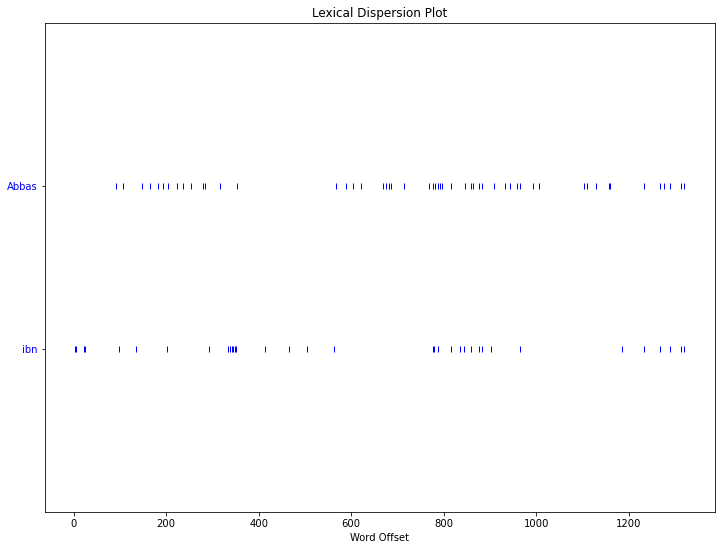

In [77]:
from nltk.draw.dispersion import dispersion_plot


word_freq_dist = FreqDist(Stop_List)
words = word_freq_dist.most_common(3)
print(words) 
#IN graph I ignore "," That's why i extract 3 most common words


plt.figure(figsize=(12, 9))
targets=[words[1][0], words[2][0]]
dispersion_plot(Stop_List , targets , ignore_case=True, title='Lexical Dispersion Plot')